PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0  

<ipython-input-23-217e0ac376b8>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.median(), inplace=True)
<ipython-input-23-217e0ac376b8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex'] = le.fit_transform(train_data['Sex'])
<ipython-input-23-217e0ac376b8>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

21/21 [==============================] - 2s 11ms/step - loss: 26.0038 - accuracy: 0.5212 - val_loss: 0.9733 - val_accuracy: 0.6303
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 13.9869 - accuracy: 0.5500 - val_loss: 0.6805 - val_accuracy: 0.6303
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 7.7635 - accuracy: 0.5167 - val_loss: 0.8154 - val_accuracy: 0.4667
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 6.5562 - accuracy: 0.5152 - val_loss: 0.7720 - val_accuracy: 0.5212
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 4.6247 - accuracy: 0.5106 - val_loss: 0.6971 - val_accuracy: 0.6303
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 3.6214 - accuracy: 0.5364 - val_loss: 0.6798 - val_accuracy: 0.6303
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 3.5192 - accuracy: 0.5439 - val_loss: 0.6904 - val_accuracy: 0.6303
Epoch 8/100
21/21 [===

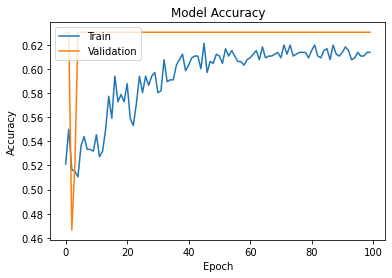

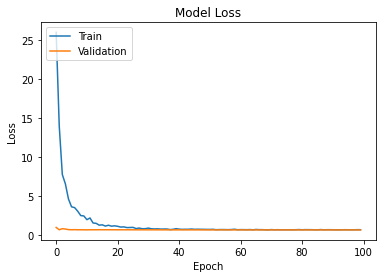

In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Check for missing values
print(train_data.isnull().sum())

# Replace missing values with the median
train_data.fillna(train_data.median(), inplace=True)

# Check for outliers in the 'Age' column
q1 = train_data['Age'].quantile(0.25)
q3 = train_data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = train_data[(train_data['Age'] < lower_bound) | (train_data['Age'] > upper_bound)]
print(outliers)

# Remove the outliers
train_data = train_data[(train_data['Age'] >= lower_bound) & (train_data['Age'] <= upper_bound)]

# Convert non-numeric features to numeric representations using label encoding
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

# Perform one-hot encoding on the 'Pclass' column
train_data = pd.get_dummies(train_data, columns=['Pclass'])

# Remove the string columns from the data
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Split the data into training and validation sets
train_dataset, val_dataset = train_test_split(train_data, test_size=0.2)

# Split the data into input and target
train_target = train_dataset.pop("Survived").replace({'0': 0, '1': 1}).astype('float32')
val_target = val_dataset.pop("Survived").replace({'0': 0, '1': 1}).astype('float32')

# Prepare the data for training
train_dataset = tf.data.Dataset.from_tensor_slices((train_dataset.values, train_target.values))
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((val_dataset.values, val_target.values))
val_dataset = val_dataset.batch(32)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation=None)
])


# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
